# Variable Characteristics

* Missing Data
* Cardinality

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df_titanic = pd.read_csv('data/titanic.csv')
df_loan = pd.read_csv('data/loan.csv')

## Missing Data

Missing data, or missing values, occur when no data is stored for a certain observation in a variable. This is a common occurrence in most datasets and can have a significant effect on the conclusions that can be drawn from the data.

### Impacts
* Scikit-lean is incompatible with missing data.
* Missing data imputation may distort variable distribution
* Affects all machine learning models

In [2]:
df_titanic.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

In [3]:
df_loan.isnull().mean()*100

customer_id                0.00
disbursed_amount           0.00
interest                   0.00
market                     0.00
employment                 6.11
time_employed              5.29
householder                0.00
income                     0.00
date_issued                0.00
target                     0.00
loan_purpose               0.00
number_open_accounts       0.00
date_last_payment          0.00
number_credit_lines_12    97.62
dtype: float64

The above cell shows percentage of missing data in variables

### Mechanisms
Understanding missing data mechanisms helps to choose the right missing data imputation.

1. __Missing Data Completely At Random (MCAR)__

    * The probability of being missing is the same for all the observations.
    * There is no relationship between the data missing and any other values, observed or missing, within the dataset.
    * Disregarding those cases would not bias the inferences made

In [4]:
df_titanic[df_titanic['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


A priori, there does not seem to be an indication that the missing information in the variable Embarked is depending on any other variable, and the fact that these women survived, means that they could have been asked for this information.

2. __Missing Data at Random (MAR)__

    * The probability of an observation being missing depends on available information.


In [5]:
df_loan['employment'].unique()

array(['Teacher', 'Accountant', 'Statistician', 'Other', 'Bus driver',
       'Secretary', 'Software developer', 'Nurse', 'Taxi driver', nan,
       'Civil Servant', 'Dentist'], dtype=object)

In [6]:
df_loan['time_employed'].unique()

array(['<=5 years', '>5 years', nan], dtype=object)

In [7]:
df_loan['time_employed'].isnull().groupby(~df_loan['employment'].isnull()).mean()

employment
False    0.857610
True     0.000533
Name: time_employed, dtype: float64

The number of borrowers who have reported occupation and have missing values in time_employed is minimal. Whereas the customers who did not report an occupation or employment, are mostly reporting missing values in the time_employed variable.

3. __Missing Data Not at Random (MNAR)__

    * There is a mechanism or a reason why missing values are introduces in the dataset.

In the Titanic dataset, both the missing values of the variables __age__ and __cabin__, were introduced systematically. For many of the people who did not survive, the age they had or the cabin they were traveling in, could not be established. The people who survived could be otherwise asked for that information.

In [8]:
df_titanic['cabin_null'] = np.where(df_titanic['cabin'].isnull(),1,0)

In [9]:
df_titanic.groupby(['survived'])['cabin_null'].mean()

survived
0    0.873918
1    0.614000
Name: cabin_null, dtype: float64

In [10]:
df_titanic['age'].isnull().groupby(df_titanic['survived']).mean()

survived
0    0.234858
1    0.146000
Name: age, dtype: float64

## Cardinality
The values of a categorical variable are selected from a group of categories(also called labels). The number of different labels is known as cardinality.

### Impacts
* Scikit-lean is incompatible with strings
* Highly cardinal varibales have uneven distribution between train and test sets
* Over-fitting in tree based algorithms
* Operational problems when using models live

#### Uneven distribution between train and test sets

For highly cardinal variables
* Some labels may appear only in train set -> over-fitting
* Some labels may appear only in test set -> model will not know how to interpret the values 

Low cardinality variables

In [11]:
print('Number of categories in the variable Sex :',len(df_titanic['sex'].unique()))
print('Number of categories in the variable Embarked :',len(df_titanic['embarked'].unique()))

Number of categories in the variable Sex : 2
Number of categories in the variable Embarked : 4


High cardinality variables

In [12]:
print('Number of categories in the variable Cabin :',len(df_titanic['cabin'].unique()))
print('Number of categories in the variable Ticket :',len(df_titanic['ticket'].unique()))

Number of categories in the variable Cabin : 182
Number of categories in the variable Ticket : 929


### Cadinality Reduction

Instead of using the entire cabin value, we will capture only first letter.

__Rationale:__ the first letter indicates the dect on which the cabin was located, and therefore an indication of both social class status and proximity to the surface. Both are known to improve the probability of survival.

In [13]:
df_titanic['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [14]:
df_titanic['cabin_reduced'] = df_titanic['cabin'].astype(str).str[0]

In [15]:
print('Number of categories in the variable Cabin Reduced :',len(df_titanic['cabin_reduced'].unique()))

Number of categories in the variable Cabin Reduced : 9


In [16]:
df_titanic[['cabin','cabin_reduced']].head()

,cabin,cabin_reduced
0,B5,B
1,C22,C
2,C22,C
3,C22,C
4,C22,C


## Rare Labels

Rare labels are those that appear only in a tiny proportion of the observations in a dataset. They have same impacts and considerations as with high cardinality.

### Impacts
* Scikit-lean is incompatible with strings
* Uneven distribution between train and test sets
* Over-fitting in tree based algorithms
* Operational problems when using models live

Hard to understand the true effect of the rare label on the outcome.
Removing rare labels may improve model performance.


In [17]:
use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

df_house = pd.read_csv('./data/houseprice.csv', usecols=use_cols)

In [18]:
df_house.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [20]:
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable:',col,' number of labels: ',df_house[col].nunique())

variable: Neighborhood  number of labels:  25
variable: Exterior1st  number of labels:  15
variable: Exterior2nd  number of labels:  16


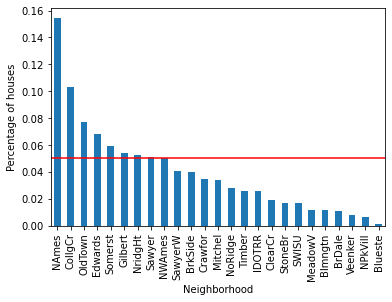

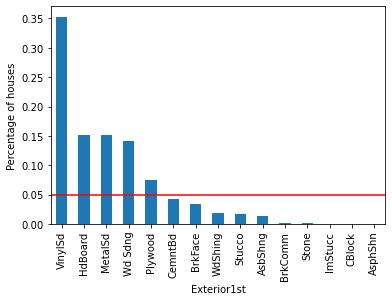

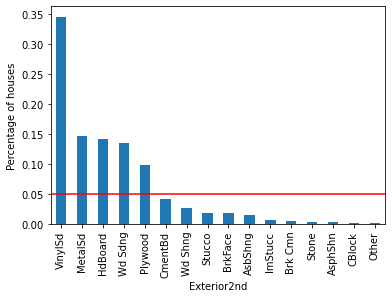

In [23]:
total_house = len(df_house)
for col in cat_cols:
    df_col = pd.Series(df_house[col].value_counts()/total_house)
    
    fig = df_col.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    
    fig.axhline(y=0.05,color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()